In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lista os nomes dos datasets disponíveis na biblioteca seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# Carrega o dataset 'titanic' da biblioteca seaborn em um DataFrame pandas chamado df
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
df['survived'].value_counts()

,count
survived,
0,549
1,342


In [7]:
# Mostra a soma dos valores nulos em cada coluna do DataFrame df
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [8]:
# Preenche os valores nulos na coluna 'age' com a média da idade, modificando o DataFrame inplace
df['age'].fillna(df['age'].mean(), inplace=True)

/tmp/ipython-input-4292124923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
# Importa a classe OneHotEncoder do módulo sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Ajustar e transformar os dados
encoder = OneHotEncoder(sparse_output=False)
encoded_sex = encoder.fit_transform(df[['sex']])

In [12]:
# Criar um novo DataFrame
encoded_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['sex']))

In [13]:
# Concatenar ao DataFrame Original
df = pd.concat([df, encoded_df], axis=1)

In [14]:
# Excluir a Coluna Antiga
df.drop(['sex', 'sex_female'], axis=1, inplace=True)

In [15]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0


In [16]:
# Calcula a matriz de correlação entre as colunas especificadas
corr = df[['pclass', 'age', 'fare', 'alone', 'sex_male', 'survived']].corr()

In [17]:
corr

,pclass,age,fare,alone,sex_male,survived
pclass,1.000000,-0.331339,-0.549500,0.135207,0.131900,-0.338481
age,-0.331339,1.000000,0.091566,0.179775,0.084153,-0.069809
fare,-0.549500,0.091566,1.000000,-0.271832,-0.182333,0.257307
alone,0.135207,0.179775,-0.271832,1.000000,0.303646,-0.203367
sex_male,0.131900,0.084153,-0.182333,0.303646,1.000000,-0.543351
survived,-0.338481,-0.069809,0.257307,-0.203367,-0.543351,1.000000


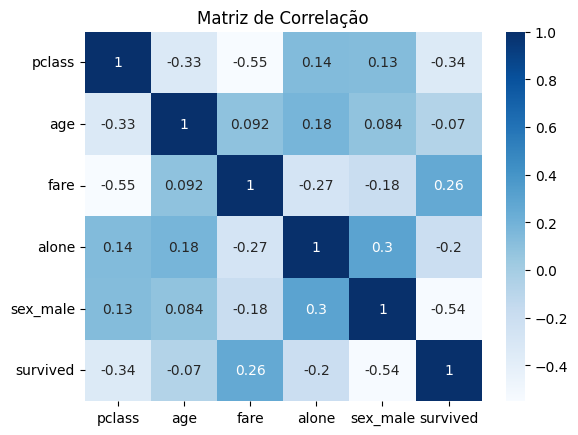

In [18]:
# Cria um heatmap da matriz de correlação
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Matriz de Correlação')
plt.show()

In [19]:
# Define as variáveis dependentes e independentes
X = df[['pclass', 'age', 'fare', 'alone', 'sex_male']]
y = df['survived']

In [20]:
# Importa as funções train_test_split e cross_val_score do módulo sklearn.model_selection
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# Importa a classe StandardScaler do módulo sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [23]:
# Cria um objeto StandardScaler
scaler = StandardScaler()

In [24]:
# Ajusta o scaler aos dados e transforma-os
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Mostra as dimensões dos conjuntos de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((596, 5), (295, 5), (596,), (295,))

In [27]:
# Importa a classe LogisticRegression do módulo sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [28]:
# Cria um objeto de modelo de regressão logística
model = LogisticRegression()

In [29]:
# Treina o modelo com os dados de treino
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
 # Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

In [31]:
# Importa as funções accuracy_score e confusion_matrix do módulo sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
# Calcula a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia * 100:.2f}')

Acurácia: 80.68


In [33]:
cm = confusion_matrix(y_test, y_pred) # Calcula a matriz de confusão

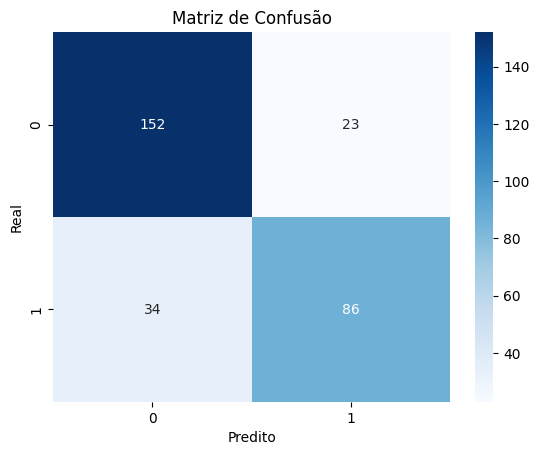

In [34]:
# Cria um heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [35]:
# Calcula a valisção curzada média do modelo
cross_valid = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Acurácia: {cross_valid.mean() * 100:.2f}')

Acurácia: 78.01


#Ajuste de Hiperparâmetros

In [36]:
# Importa a classe GridSearchCV do módulo sklearn.model_selection
from sklearn.model_selection import GridSearchCV

In [37]:
# Define a grade de parâmetros para a busca em grade
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # Atualizado os solvers
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

In [38]:
 # Cria um objeto GridSearchCV com os parâmetros definidos
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [39]:
 # Realiza a busca em grade com os dados de treino
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [40]:
# Melhor modelo do GridSearch
best_model = grid_search.best_estimator_

In [41]:
# Fazendo previsões no conjunto de teste
y_pred2 = best_model.predict(X_test)

In [42]:
# Calcula a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred2)
print(f'Acurácia: {acuracia * 100:.2f}')

Acurácia: 80.00


In [43]:
# Calcula a valisção curzada média do modelo
cross_valid = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f'Acurácia: {cross_valid.mean() * 100:.2f}')

Acurácia: 77.00


In [44]:
 # Importa a função precision_recall_curve do módulo sklearn.metrics
from sklearn.metrics import precision_recall_curve

#Ajuste de Threshold

In [45]:
# Vamos assumir que 'best_model' é o seu melhor modelo treinado.
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva (sobreviventes)

In [46]:
# Cálculo da curva Precisão-Recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

In [47]:
# Calculando o F1-score para cada threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

In [48]:
# Encontrar o índice do threshold que maximiza o F1-score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

In [49]:
print(f'Threshold ideal baseado na curva Precisão-Recall: {optimal_threshold:.5f}')

Threshold ideal baseado na curva Precisão-Recall: 0.37821


In [50]:
# Avaliação com o threshold ideal
y_pred_custom_ideal = (y_prob >= optimal_threshold).astype(int)  # Previsões com o threshold ideal

In [51]:
cm = confusion_matrix(y_test, y_pred_custom_ideal) # Calcula a matriz de confusão

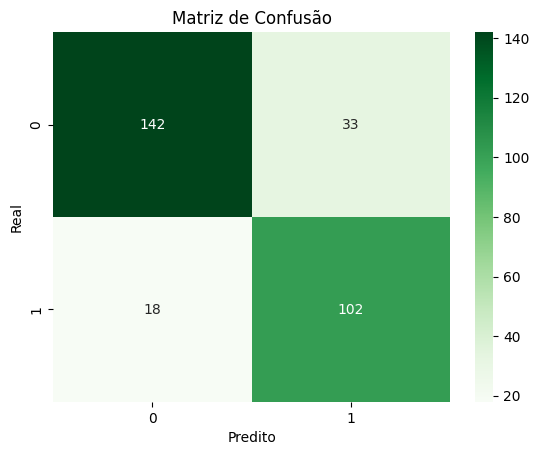

In [52]:
# Cria um heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()